In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets

In [0]:
x,y = sklearn.datasets.make_moons(200,noise=0.20)

<function matplotlib.pyplot.show>

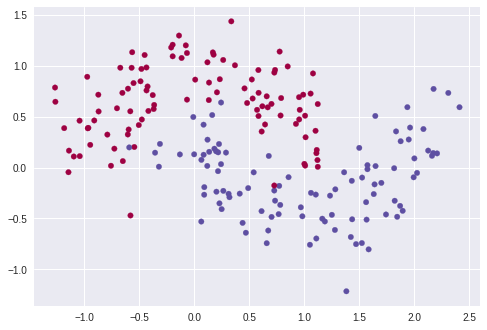

In [4]:
plt.scatter(x[:,0],x[:,1], s=30, c=y, cmap=plt.cm.Spectral)
plt.show

In [0]:
x=torch.FloatTensor(x)
y=torch.LongTensor(y)

In [0]:
class FeedForward(torch.nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(FeedForward, self).__init__()
    self.hidden=nn.Linear(input_size, hidden_size)
    self.out=nn.Linear(hidden_size,output_size)
  def forward(self, x):
    x =self.hidden(x)
    x= F.relu(x)
    x= self.out(x)
    return x

In [0]:
network = FeedForward(input_size=2, hidden_size=50, output_size=2)
optimizer=torch.optim.SGD(network.parameters(), lr=0.02)
loss_function=torch.nn.CrossEntropyLoss()

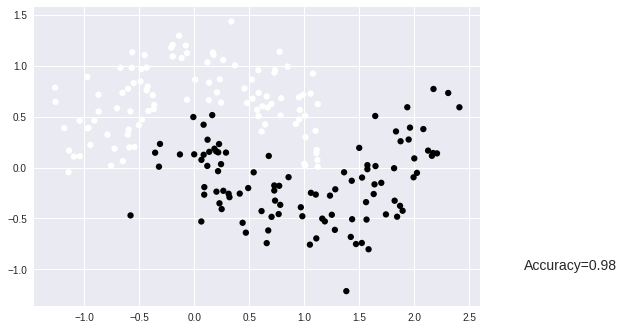

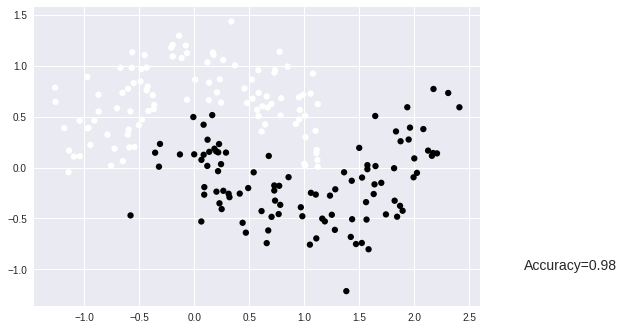

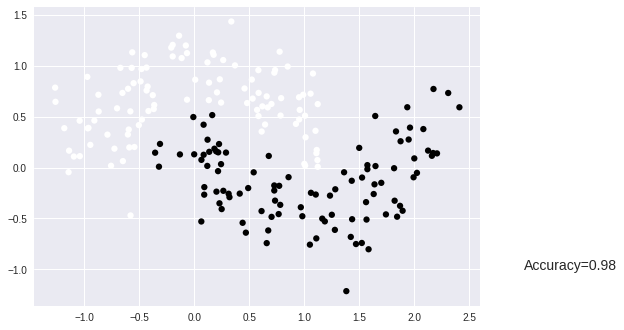

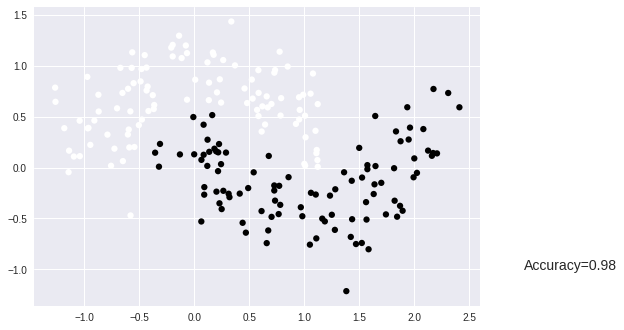

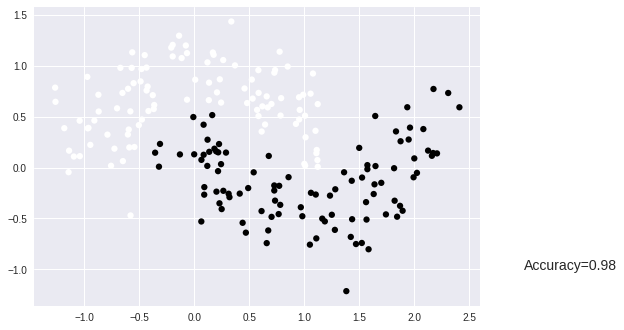

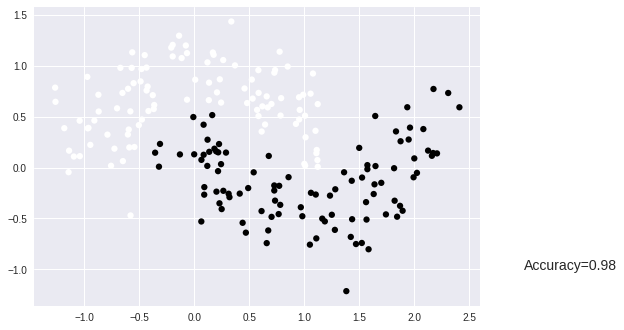

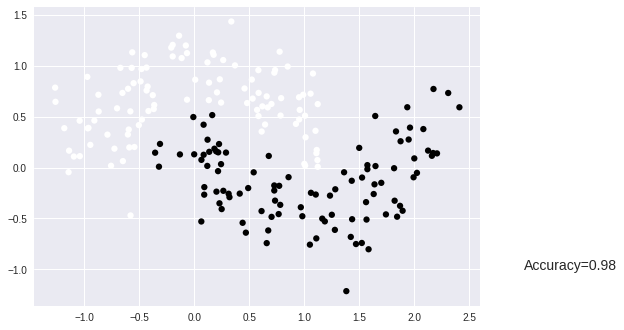

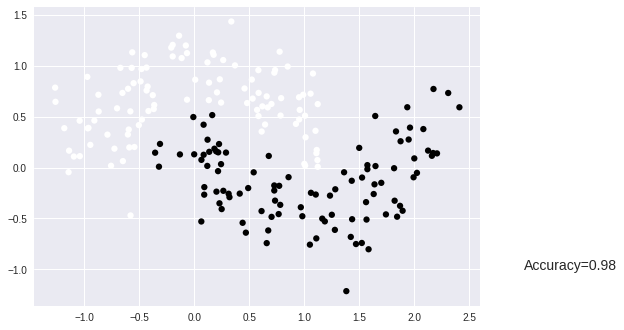

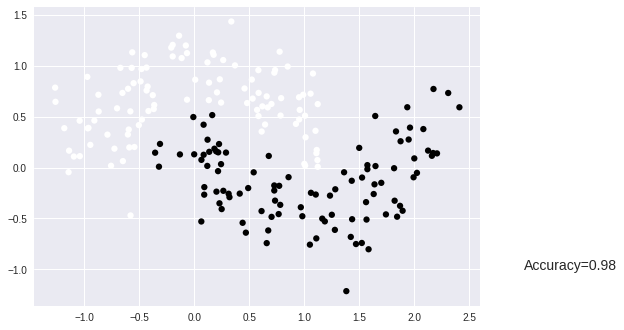

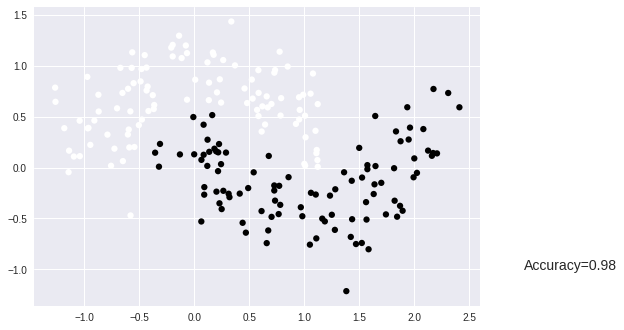

In [25]:
plt.ion()
for epoch in range(10000):
  out=network(x)
  loss=loss_function(out,y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  
  if epoch % 1000 ==0:
    max_predicted, prediction=torch.max(out,1)
    predicted_y= prediction.data.numpy()
    target_y=y.data.numpy()
    plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1], s=40, c=predicted_y, lw=0)
    accuracy=(predicted_y==target_y).sum() / target_y.size
    plt.text(3,-1,'Accuracy={:.2f}'.format(accuracy), fontdict={'size':14})
    plt.pause(0.1)

plt.ioff()
plt.show()
  